In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np


In [17]:
my_dataframe=pd.read_csv('2015.csv')
my_dataframe.shape

<ipython-input-17-1c2cbf03f2e1>:1: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  my_dataframe=pd.read_csv('2015.csv')


(656904, 17)

In [18]:
#my_dataframe.isnull().sum()
my_dataframe.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,15/06/2015 00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,15/06/2015 00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,15/06/2015 00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,15/06/2015 00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,15/06/2015 00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"


<Axes: >

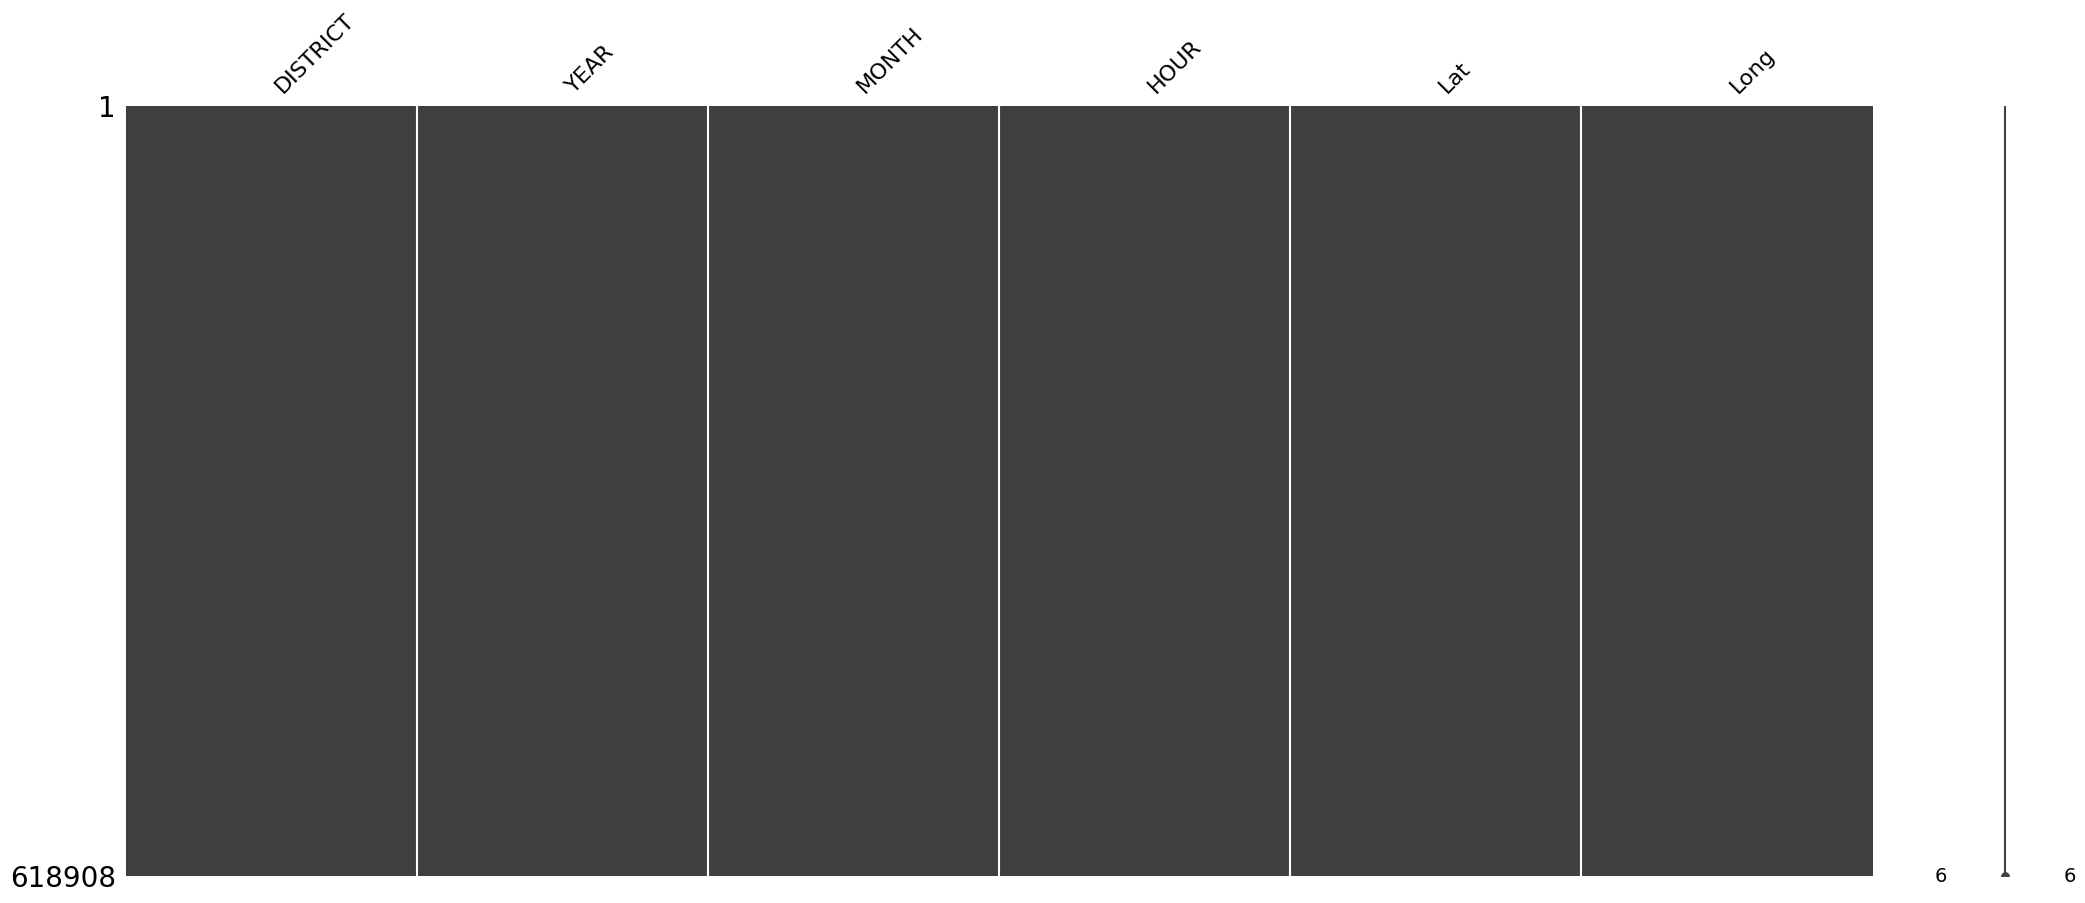

In [22]:
msno.matrix(my_dataframe)

In [19]:
my_dataframe.drop(['OFFENSE_DESCRIPTION','INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Location','DAY_OF_WEEK'], axis=1, inplace=True)


In [20]:
# Drop rows with null values in both 'DISTRICT' and 'Location'
my_dataframe = my_dataframe.dropna(subset=['DISTRICT','Lat','Long'])

my_dataframe.shape

(618908, 6)

In [21]:
my_dataframe.columns

Index(['DISTRICT', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'], dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

le_district = LabelEncoder()
my_dataframe['DIScTRICT'] = le_district.fit_transform(my_dataframe['DISTRICT'])

X = my_dataframe.drop(['Lat', 'Long'], axis=1)
y = my_dataframe[['Lat', 'Long']]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build The model
model = Sequential()
model.add(LSTM(150, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2, activation='linear')) 
# Compile the mo  del
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Train the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)


# Print the mean squared error
print("Mean Squared Error:", mse)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150)               93000     
                                                                 
 dense_1 (Dense)             (None, 2)                 302       
                                                                 
Total params: 93302 (364.46 KB)
Trainable params: 93302 (364.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
12379/12379 [==============================] - 63s 5ms/step - loss: 103.3321 - val_loss: 0.0398
Epoch 2/100
12379/12379 [==============================] - 60s 5ms/step - loss: 0.0018 - val_loss: 0.0362
Epoch 3/100
12379/12379 [==============================] - 58s 5ms/step - loss: 0.0011 - val_loss: 0.0358
Epoch 4/100
12379/12379 [==============================] - 58s 5ms/step - loss: 0.0010 - val

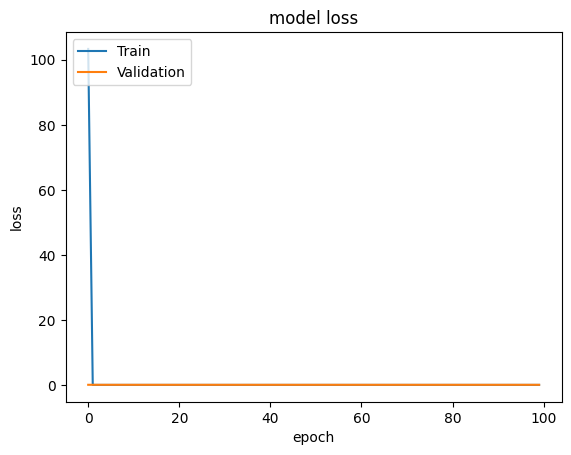

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [25]:
new_data=pd.read_csv('2023_to_ Present.csv')

<ipython-input-25-967c21d39ee3>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data=pd.read_csv('2023_to_ Present.csv')


In [26]:
new_data.drop(['OFFENSE_DESCRIPTION','INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Location','DAY_OF_WEEK'], axis=1, inplace=True)


In [27]:
new_data = new_data.dropna(subset=[ 'DISTRICT','Lat','Long'])

In [28]:
new_data.columns

Index(['DISTRICT', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'], dtype='object')

In [29]:
# Use LabelEncoder for encoding categorical variables
le_district = LabelEncoder()
new_data['DISTRICT'] = le_district.fit_transform(new_data['DISTRICT'])


X = new_data.drop(['Lat', 'Long'], axis=1)
y = new_data[['Lat', 'Long']]

# Normalize input features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# Reshape the new data for LSTM
new_data_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1])

# Make predictions on the new data
predictions = model.predict(new_data_reshaped)

predicted_latitudes = predictions[:, 0]
predicted_longitudes = predictions[:, 1]

# Print or use the predicted values as needed
print("Predicted Latitudes:", predicted_latitudes)
print("Predicted Longitudes:", predicted_longitudes)


1898/1898 [==============================] - 5s 3ms/step
Predicted Latitudes: [42.34286  42.367725 42.35122  ... 42.36901  42.305054 42.354023]
Predicted Longitudes: [-71.06461  -71.09869  -71.08002  ... -71.086555 -71.07925  -71.151085]


In [30]:

results_df = pd.DataFrame({
    'Expected_Latitude': y['Lat'][:len(predictions)],
    'Expected_Longitude': y['Long'][:len(predictions)],
    'Predicted_Latitude': predictions[:, 0],
    'Predicted_Longitude': predictions[:, 1]
})
# Save the DataFrame to a CSV file
results_df.to_csv('predictions_results.csv', index=False)
